# MDL Assignment 1

### Import required modules :

In [3]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model


### Load the data from test.pkl and train.pkl

In [4]:
f = open('./data/train.pkl','rb')
train_data = pickle.load(f)
f.close()

In [5]:
f = open('./data/test.pkl','rb')
test_data = pickle.load(f)
f.close()

In [7]:
type(train_data)

numpy.ndarray

### Shuffle the training data

In [8]:
random.shuffle(train_data)

### Visualize the test and training data

In [9]:
train_data.shape
test_data.shape

(80, 2)

In [10]:
test_data = test_data[test_data[:,0].argsort()]

In [11]:
x_train = train_data[:,0]
y_train = train_data[:,1]

x_test = test_data[:,0]
y_test = test_data[:,1]


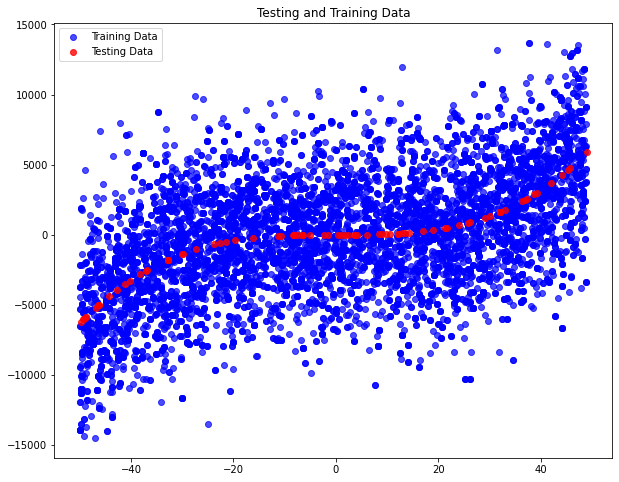

In [12]:
plt.figure(figsize=(10,8))
plt.scatter(x_train,y_train,label="Training Data",color ="b",alpha = .7)
plt.scatter(x_test,y_test,label="Testing Data",color ="r",alpha = .8)
plt.legend()
plt.title("Testing and Training Data")
plt.show()

### splitting training data into 10 partitions

In [13]:
x_partitioned = np.array_split(x_train,10)
y_partitioned = np.array_split(y_train,10)

### Training the data (training 10 realizations for 20 models)

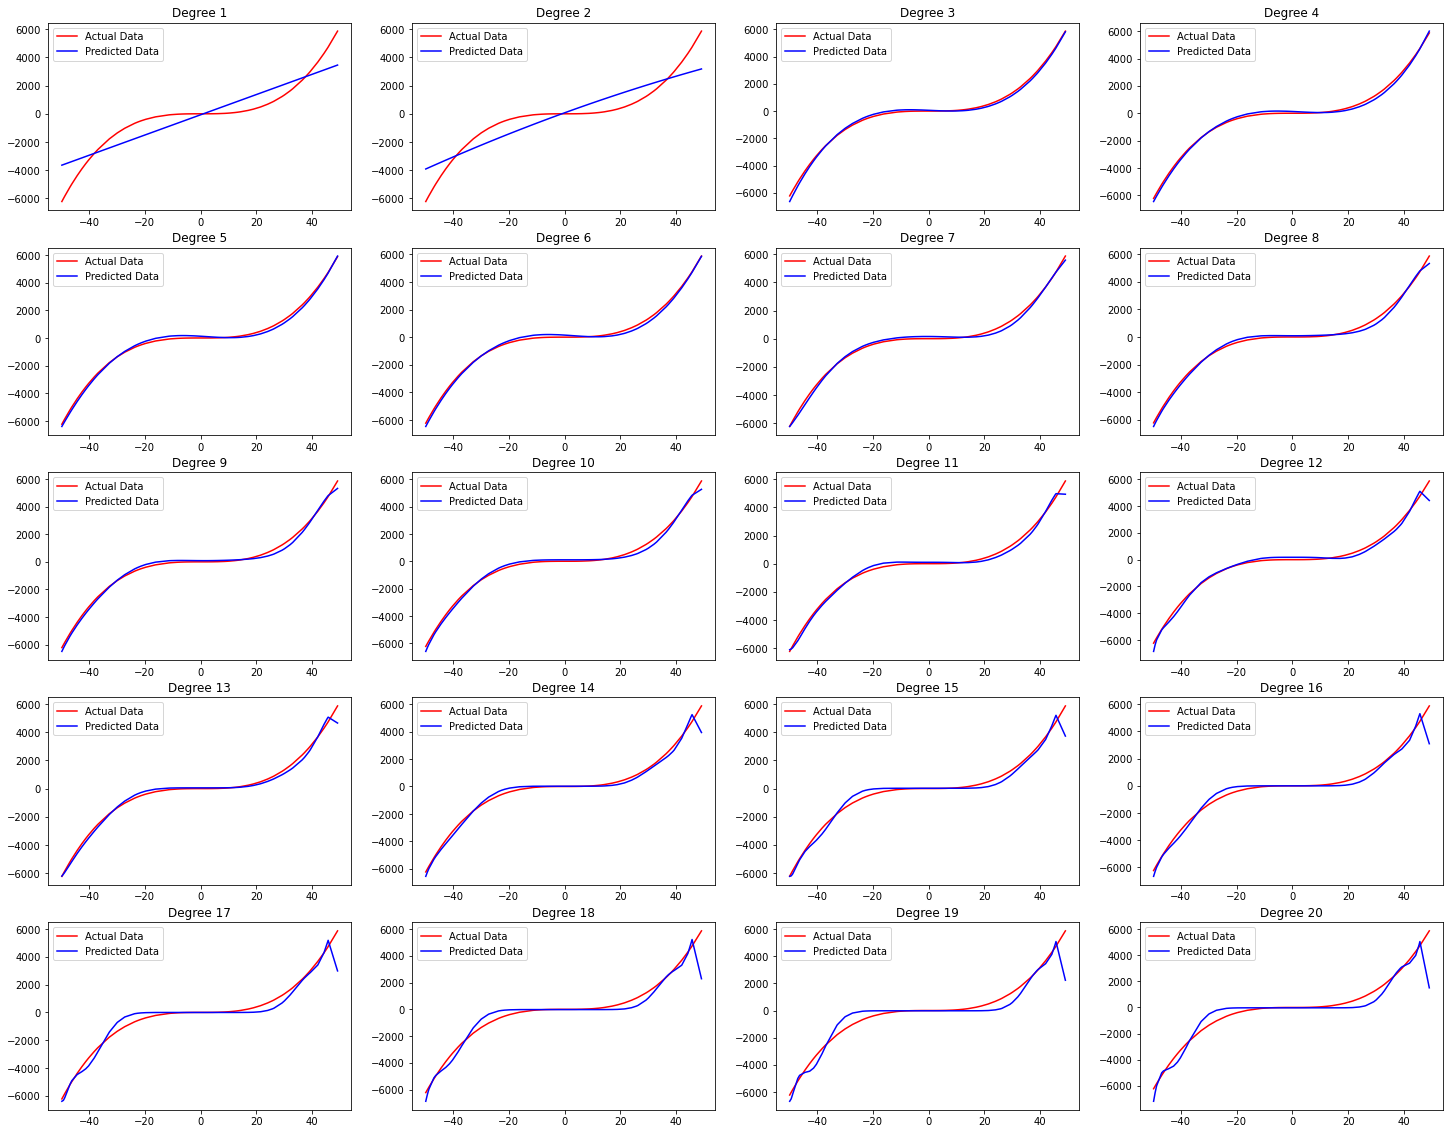

In [37]:
bias = np.zeros(shape=(20))
bias_sq = np.zeros(shape=(20))
variance= np.zeros(shape=(20))
mse= np.zeros(shape=(20))
ire = np.zeros(shape=(20))

plt.figure(figsize=(25,20))
for deg in range(1,21):
    poly = PolynomialFeatures(deg)
    
    y_predicted  = np.zeros(shape=(10,80))

    for chunk in range(0,10):
        
        curr_X = poly.fit_transform(x_partitioned[chunk].reshape(-1,1))
        curr_Y = y_partitioned[chunk]

        reg = linear_model.LinearRegression()
        reg.fit(curr_X,curr_Y)
        
        X_test = poly.transform(x_test.reshape(-1,1))

        y = reg.predict(X_test)
        y_predicted[chunk] = y    
        
        

        
    mean = np.mean(y_predicted,axis = 0)
    
    ## Plotting The Predicted Vs Actual Data
    plt.subplot(5,4,deg)
    plt.title("Degree " + str(deg))
    plt.plot(x_test,y_test,color ="r",label="Actual Data")
    plt.plot(x_test,mean,color = "b",label = "Predicted Data")
    plt.legend()
    
    #BIAS:
    curr_bias = np.mean(abs(mean - y_test))
    bias[deg-1] = (curr_bias)
    
    #BIAS squared:
    curr_bias_sq = np.mean((mean - y_test)**2)
    bias_sq[deg-1] = (curr_bias_sq)
    
    
    
    #VARIANCE:
    curr_variance = np.square(np.subtract(y_predicted,mean))
    curr_variance = np.mean(curr_variance,axis = 0)
    variance[deg-1]=(np.mean(curr_variance))
   
    #MSE:
    curr_mse = np.square(np.subtract(y_predicted,y_test))
    curr_mse = np.mean(curr_mse,axis = 0)
    mse[deg-1] = np.mean(curr_mse)
    
    #IRE:
    
    ire[deg-1] = mse[deg-1] - bias_sq[deg-1] - variance[deg-1]

plt.show()
    
    

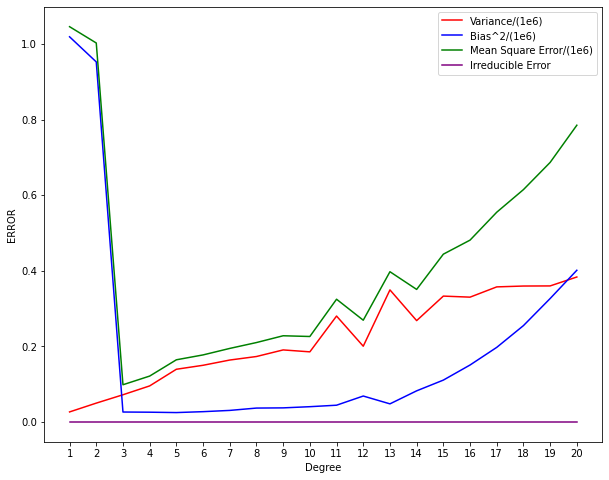

In [38]:
deg = range(1,21)
plt.figure(figsize=(10,8))
plt.plot(deg,variance/1e6,color='r',label="Variance/(1e6)")
plt.plot(deg,bias_sq/1e6,label = "Bias^2/(1e6)",color='b')

plt.plot(deg,mse/1e6, label = "Mean Square Error/(1e6)",color='g')
plt.plot(deg,ire,label = "Irreducible Error",color='purple')
plt.xticks(np.arange(1,21,step = 1))
plt.xlabel('Degree')
plt.ylabel('ERROR')

plt.legend()
plt.show()

In [39]:
table=pd.DataFrame({'Degree':deg,'Mean Square Error':mse,'Bias^2':bias,'Variance': variance})
table.set_index('Degree', inplace=True)

In [40]:
table

Mean Square Error      Bias^2       Variance
Degree                                              
1            1.045556e+06  807.703265   26725.216750
2            1.002444e+06  795.766245   50015.665725
3            9.860149e+04  134.105237   72126.082513
4            1.215498e+05  141.929310   95538.599798
5            1.646022e+05  142.347871  139566.806412
6            1.774962e+05  147.594282  150085.687775
7            1.946728e+05  148.700456  163944.089080
8            2.102126e+05  160.551019  173284.249159
9            2.281560e+05  161.505803  190708.497945
10           2.262148e+05  167.622877  185629.937693
11           3.247842e+05  169.283624  280284.649056
12           2.693090e+05  193.512391  200535.801257
13           3.975066e+05  153.354987  349442.395010
14           3.507265e+05  172.528499  268212.736516
15           4.439414e+05  205.231048  333051.001867
16           4.810926e+05  210.098605  330278.762649
17           5.548678e+05  260.900362  357411.373644
18           6.146846e+05  270.683950  359671.265516
19           6.865835e+05  334.513512  359970.718402
20           7.849758e+05  344.416689  383584.185608

In [41]:
table=pd.DataFrame({'Degree':deg,'Bias':bias,'Bias^2':bias_sq,'Variance': variance})
table.set_index('Degree', inplace=True)

In [42]:
table

Bias        Bias^2       Variance
Degree                                         
1       807.703265  1.018831e+06   26725.216750
2       795.766245  9.524283e+05   50015.665725
3       134.105237  2.647541e+04   72126.082513
4       141.929310  2.601123e+04   95538.599798
5       142.347871  2.503540e+04  139566.806412
6       147.594282  2.741053e+04  150085.687775
7       148.700456  3.072871e+04  163944.089080
8       160.551019  3.692831e+04  173284.249159
9       161.505803  3.744754e+04  190708.497945
10      167.622877  4.058488e+04  185629.937693
11      169.283624  4.449952e+04  280284.649056
12      193.512391  6.877321e+04  200535.801257
13      153.354987  4.806423e+04  349442.395010
14      172.528499  8.251376e+04  268212.736516
15      205.231048  1.108904e+05  333051.001867
16      210.098605  1.508138e+05  330278.762649
17      260.900362  1.974564e+05  357411.373644
18      270.683950  2.550133e+05  359671.265516
19      334.513512  3.266127e+05  359970.718402
20      344.416689  4.013917e+05  383584.185608

Text(0.5, 1.0, 'Variance of Models')

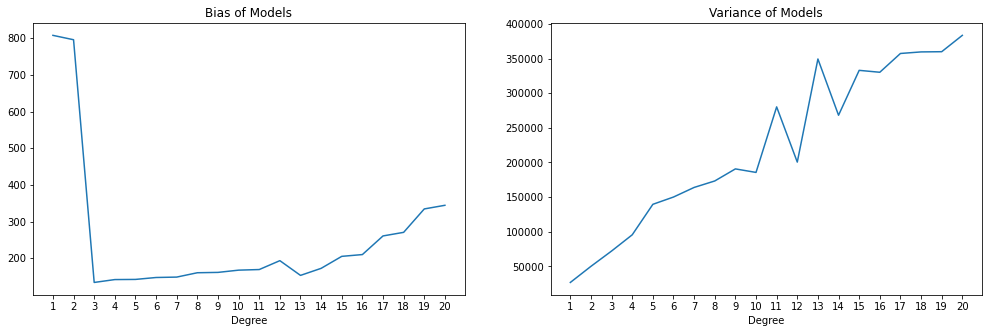

In [43]:
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
plt.plot(deg,bias)
plt.xticks(np.arange(1,21,step = 1))
plt.xlabel('Degree')
plt.title("Bias of Models")
plt.subplot(1,2,2)
plt.plot(deg,variance)
plt.xticks(np.arange(1,21,step = 1))
plt.xlabel('Degree')
plt.title("Variance of Models")